In [19]:
import sys
sys.path.append('/home/david/fashionAI/rcnn/rcnn')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
import skimage.io as io
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import json
from pathlib import Path

In [24]:
root_path = '/data/david/cocoapi'
# image_set = 'train2017'
image_set = 'val2017'
# image_set = 'test2017'
json_instances_anno_file = Path(root_path, 'annotations', 'instances_%s.json'%image_set)
# json_kp_anno_file = Path(root_path, 'annotations', 'person_keypoints_%s.json'%image_set)
# trainAnnFile = dataPath + '/annotations/instances_train2017.json'
# valAnnFile = rootPath + '/annotations/instances_val2017.json'
# json_file='./annotations/person_keypoints_val2017.json'  # Object Keypoint 类型的标注格式
# json_file='./annotations/captions_val2017.json' # Image Caption的标注格式

coco=COCO(json_instances_anno_file.as_posix())

loading annotations into memory...
Done (t=0.64s)
creating index...
index created!


In [25]:
cats = coco.loadCats(coco.getCatIds())
cat_nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(cat_nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



In [37]:
imgIds = coco.getImgIds()
imgId=np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds[imgId])[0]
img_path = Path(root_path, 'images', image_set, img['file_name'])
# dir(img_path)
assert img_path.exists(), "image %s not exists" % img_path.as_posix()
I = io.imread(img_path)

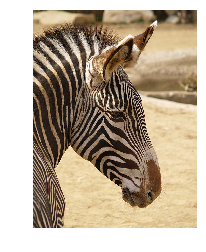

In [38]:
plt.axis('off')
plt.imshow(I)
plt.show()

[{'iscrowd': 0, 'bbox': [0.0, 15.14, 379.1, 618.37], 'id': 590187, 'segmentation': [[2.88, 80.0, 76.4, 49.73, 141.26, 45.41, 194.59, 48.29, 243.6, 62.7, 260.9, 84.32, 337.3, 49.73, 376.22, 15.14, 361.8, 55.5, 325.77, 126.13, 296.94, 160.72, 265.23, 176.58, 322.88, 263.06, 347.39, 395.68, 379.1, 477.84, 374.77, 551.35, 324.32, 577.3, 278.2, 570.09, 250.81, 545.59, 253.69, 522.52, 174.41, 456.22, 162.88, 443.24, 106.67, 404.32, 64.86, 456.22, 67.75, 477.84, 103.78, 580.18, 87.93, 633.51, 0.0, 629.19, 1.44, 82.88]], 'image_id': 236730, 'area': 158726.1391, 'category_id': 24}]


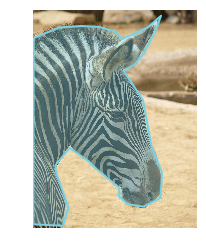

In [40]:
catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==imgIds[imgId]:
        catIds.append(ann['category_id'])

plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
print(anns)
plt.show()

In [41]:
aa=[2.88, 80.0, 76.4, 49.73, 141.26, 45.41, 194.59, 48.29, 243.6, 62.7, 260.9, 84.32, 337.3, 49.73, 376.22, 15.14, 361.8, 55.5, 325.77, 126.13, 296.94, 160.72, 265.23, 176.58, 322.88, 263.06, 347.39, 395.68, 379.1, 477.84, 374.77, 551.35, 324.32, 577.3, 278.2, 570.09, 250.81, 545.59, 253.69, 522.52, 174.41, 456.22, 162.88, 443.24, 106.67, 404.32, 64.86, 456.22, 67.75, 477.84, 103.78, 580.18, 87.93, 633.51, 0.0, 629.19, 1.44, 82.88]
len(aa)

58